**K-Means**

In [23]:
import pandas as pd
import numpy as np

df=pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [26]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [17]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#for e in categorical:
#  df[e] = label_encoder.fit_transform(df[e])

In [28]:
X = df.drop(['Outcome'], axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

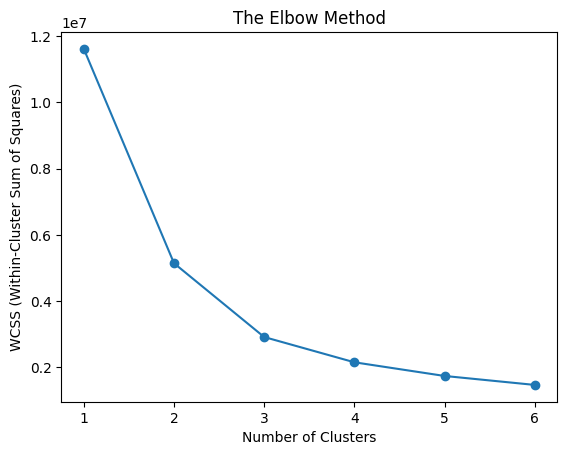

In [29]:
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [30]:
kmeans = KMeans(3)
kmeans.fit(X)
identified_clusters = kmeans.fit_predict(X)
identified_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1,

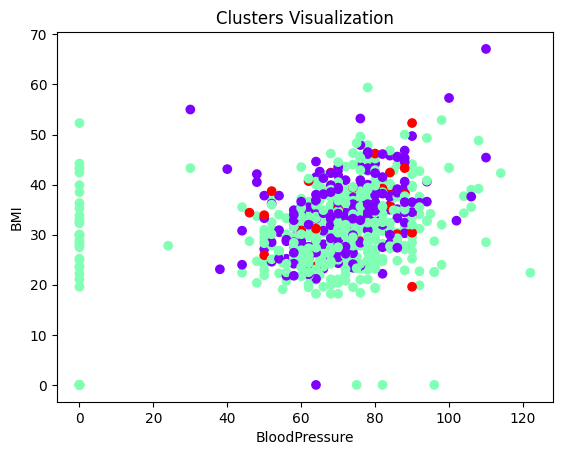

In [31]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['BloodPressure'], data_with_clusters['BMI'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlabel('BloodPressure')
plt.ylabel('BMI')
plt.title('Clusters Visualization')
plt.show()


**K-Medoid**

In [32]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.3 MB/s eta 0:00:00


In [33]:
from sklearn_extra.cluster import KMedoids

In [34]:
Kmedoids = KMedoids(3)
Kmedoids.fit(X)
identified_clusters = Kmedoids.fit_predict(X)
identified_clusters

array([1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2,
       0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1,
       0, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0,
       1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 2,
       2, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1,
       0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2,
       0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1,

The fit_predict method is used to predict the cluster index for each data point in the dataset. It assigns each data point to one of the three clusters based on their proximity to the cluster centers learned during the training phase.

Finally, the variable identified_clusters contains an array where each element corresponds to the cluster assignment for the respective data point. If you print identified_clusters, you will see an array of integers, where each integer represents the cluster to which the corresponding data point belongs.



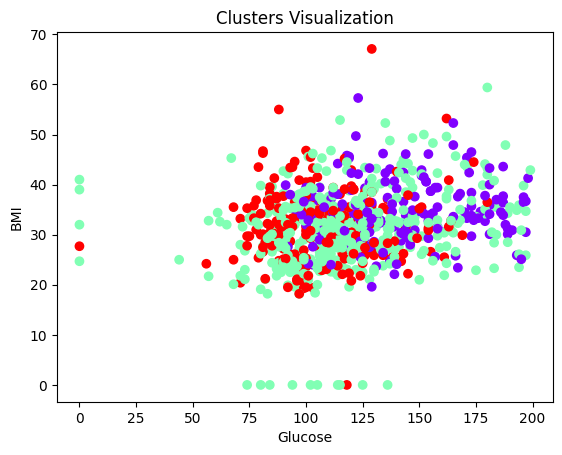

In [35]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters

plt.scatter(
    data_with_clusters['Glucose'],
    data_with_clusters['BMI'],
    c=data_with_clusters['Clusters'],
    cmap='rainbow'
)

plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Clusters Visualization')
plt.show()


**Hierarchical clustering**

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()
X_scaled= sc.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [38]:
import scipy.cluster.hierarchy as shc

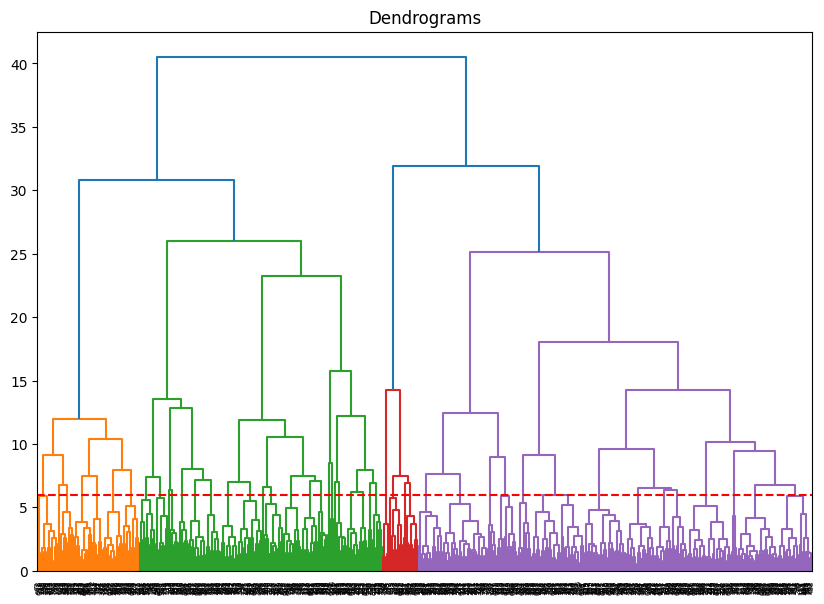

In [39]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2,

**DBScan**

In [42]:
from sklearn.cluster import DBSCAN

In [43]:
dbscan = DBSCAN()
dbscan.fit_predict(X_scaled)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1